In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F 

In [0]:
class CartPoleNet(nn.Module): 
  def __init__(self):
    super(CartPoleNet, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.fc1 = nn.Linear(149 * 199 * 6, 120) # resulting width x height from conv and max
    self.fc2 = nn.Linear(120, 100)
    self.fc3 = nn.Linear(100, 50)
    self.fc4 = nn.Linear(50, 4)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), 2) 
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features


In [3]:
net = CartPoleNet()
print(net)

CartPoleNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=177906, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=4, bias=True)
)


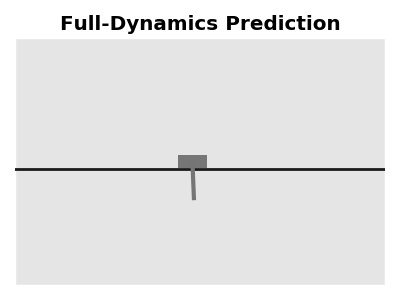

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('4.jpg', 0)

cv2_imshow(img)
img = torch.from_numpy(img).unsqueeze(0).unsqueeze(0)

In [5]:
input = torch.randn(1, 1, 300, 400)
out = net(input)
print(out)

tensor([[-0.1286, -0.0481, -0.2095, -0.1662]], grad_fn=<AddmmBackward>)


In [9]:
print(type(input))
print(type(img))

print(input.size())
print(img.size())
img = img.float()
print(input.dtype)
print(img.dtype)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([1, 1, 300, 400])
torch.Size([1, 1, 300, 400])
torch.float32
torch.float32


In [0]:
out = net(img)